In [5]:
!pip install snowflake-connector-python snowflake-sqlalchemy pandas scikit-learn matplotlib seaborn xgboost


In [6]:
!pip install folium

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import snowflake.connector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sqlalchemy import create_engine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
# Establish Snowflake connection
conn = snowflake.connector.connect(
    user='TharinduAkash',
    password='TharinduAkash@820',
    account='dqgqrfx-sz81313',
    warehouse='COMPUTE_WH',
    database='SALES_DB',
    schema='SALES_SCHEMA'
)


## Predict Shipment Status


In [11]:
# Query
query = """
SELECT   Sales,  Quantity, Discount, DaystoShipActual, DaystoShipScheduled,
       SalesForecast, SalesperCustomer, ProfitRatio, ShipMode, ShipStatus
FROM Orders
"""

In [14]:

# Load data
df_ship = pd.read_sql(query, conn)

# Normalize column names to lowercase
df_ship.columns = df_ship.columns.str.lower()

# Check columns
print("Columns after normalization:", df_ship.columns.tolist())

# Clean missing values
df_ship.dropna(inplace=True)


<ipython-input-14-fc12dfd88c11>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ship = pd.read_sql(query, conn)


Columns after normalization: ['sales', 'quantity', 'discount', 'daystoshipactual', 'daystoshipscheduled', 'salesforecast', 'salespercustomer', 'profitratio', 'shipmode', 'shipstatus']


In [16]:

# Encode 'ShipStatus'
df_ship['shipmode'] = LabelEncoder().fit_transform(df_ship['shipmode'])

# Encode 'ship_status'
df_ship['shipstatus'] = LabelEncoder().fit_transform(df_ship['shipstatus'])




In [19]:
# Features and label
X = df_ship.drop('shipstatus', axis=1)
y = df_ship['shipstatus']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
print(np.isinf(X_train).any())

sales                  False
quantity               False
discount               False
daystoshipactual       False
daystoshipscheduled    False
salesforecast          False
salespercustomer       False
profitratio             True
shipmode               False
dtype: bool


In [20]:
X_train = np.nan_to_num(X_train, posinf=np.nan, neginf=np.nan)

In [21]:
print(np.max(X_train))
print(np.min(X_train))

nan
nan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Shipment Status Prediction Accuracy: 1.0

F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1473
           1       1.00      1.00      1.00       792
           2       1.00      1.00      1.00       734

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999



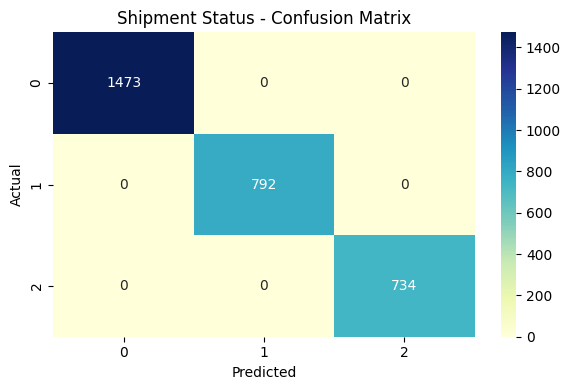

In [22]:

clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Shipment Status Prediction Accuracy:", accuracy_score(y_test, y_pred))
print("\nF1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Shipment Status - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Predict Sales Forecast

In [24]:
query = """
SELECT Sales,  Quantity, Discount, DaystoShipActual, DaystoShipScheduled,
       SalesForecast, SalesperCustomer, ProfitRatio, ShipMode, ShipStatus
FROM Orders
"""
df_ship = pd.read_sql(query, conn)

<ipython-input-24-51835a1e4bb4>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ship = pd.read_sql(query, conn)


In [27]:
df_ship.dropna(inplace=True)
X = pd.get_dummies(df_ship.drop('SHIPSTATUS', axis=1))
y = df_ship['SHIPSTATUS']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


import numpy as np

# Check for infinite values
print(np.isinf(X_train).any())

X_train = np.nan_to_num(X_train, posinf=np.nan, neginf=np.nan)


SALES                      False
QUANTITY                   False
DISCOUNT                   False
DAYSTOSHIPACTUAL           False
DAYSTOSHIPSCHEDULED        False
SALESFORECAST              False
SALESPERCUSTOMER           False
PROFITRATIO                 True
SHIPMODE_First Class       False
SHIPMODE_Same Day          False
SHIPMODE_Second Class      False
SHIPMODE_Standard Class    False
dtype: bool


In [31]:
print(np.max(X_train))
print(np.min(X_train))

29665.0
-inf


In [36]:
print("Type of X_train:", type(X_train))
print("Shape:", X_train.shape if hasattr(X_train, 'shape') else 'No shape attribute')
print("First element type:", type(X_train[0]) if hasattr(X_train, '__getitem__') else 'Unknown')

Type of X_train: <class 'numpy.ndarray'>
Shape: (6995, 12)
First element type: <class 'numpy.ndarray'>


In [41]:
X_train = np.array(X_train, dtype=np.float64)
import pandas as pd
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.astype(np.float64).values

X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').values

In [43]:
import numpy as np

# Convert to numpy float64 array
X_train = np.asarray(X_train, dtype=np.float64)

# Check for infinite values
is_inf = np.isinf(X_train)
print("Number of infinite values:", np.sum(is_inf))




Number of infinite values: 1


In [44]:
X_train[is_inf] = np.nan

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_clean = imputer.fit_transform(X_train)

# Verify
print("Min value after cleaning:", np.nanmin(X_train_clean))
print("Max value after cleaning:", np.nanmax(X_train_clean))

Min value after cleaning: -4.0
Max value after cleaning: 29665.0


In [46]:
import pandas as pd

# Convert to DataFrame
df_train = pd.DataFrame(X_train)

# Convert all columns to numeric, coercing errors to NaN
for col in df_train.columns:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

# Now handle infinite values
X_train_clean = df_train.replace([np.inf, -np.inf], np.nan).values

print("Min value after cleaning:", np.nanmin(X_train_clean))

Min value after cleaning: -4.0


In [47]:

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Shipment Status Prediction Accuracy:", accuracy_score(y_test, y_pred))

Shipment Status Prediction Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Predict Sales Forecast

In [48]:
query = """
SELECT Sales,  Quantity, Discount, DaystoShipActual, DaystoShipScheduled,
       SalesForecast, SalesperCustomer, ProfitRatio, ShipMode, ShipStatus
FROM Orders
"""
df_forecast = pd.read_sql(query, conn)

<ipython-input-48-70e7fa1a1855>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_forecast = pd.read_sql(query, conn)


In [56]:
df_forecast.dropna(inplace=True)
X = df_forecast.drop('SALESFORECAST', axis=1)
y = df_forecast['SALESFORECAST']

In [57]:
print(X_train.dtypes)

SALES                  float64
QUANTITY                 int64
DISCOUNT               float64
DAYSTOSHIPACTUAL         int64
DAYSTOSHIPSCHEDULED      int64
SALESPERCUSTOMER       float64
PROFITRATIO            float64
SHIPMODE                object
SHIPSTATUS              object
dtype: object


In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [59]:
import numpy as np
from scipy import sparse

# Check if sparse matrix (output of OneHotEncoder)
if sparse.issparse(X_train_processed):
    X_train_dense = X_train_processed.toarray()
else:
    X_train_dense = X_train_processed

print("Infinite values:", np.isinf(X_train_dense).any())
print("NaN values:", np.isnan(X_train_dense).any())
print("Max value:", np.max(X_train_dense))
print("Min value:", np.min(X_train_dense))

Infinite values: True
NaN values: False
Max value: 22638.48
Min value: -inf


In [61]:
import numpy as np
import pandas as pd

# Replace infinite values with NaN
df_forecast.replace([np.inf, -np.inf], np.nan, inplace=True)



In [63]:
# Identify numeric and categorical columns
numeric_cols = df_forecast.select_dtypes(include=['number']).columns
categorical_cols = df_forecast.select_dtypes(include=['object', 'category']).columns

In [64]:
from sklearn.impute import SimpleImputer

# Create imputer for numeric columns
numeric_imputer = SimpleImputer(strategy='median')

# Apply to numeric columns only
df_forecast[numeric_cols] = numeric_imputer.fit_transform(df_forecast[numeric_cols])

In [65]:
# Create imputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply to categorical columns only
df_forecast[categorical_cols] = categorical_imputer.fit_transform(df_forecast[categorical_cols])

In [66]:
print("Remaining missing values:")
print(df_forecast.isna().sum())

Remaining missing values:
SALES                  0
QUANTITY               0
DISCOUNT               0
DAYSTOSHIPACTUAL       0
DAYSTOSHIPSCHEDULED    0
SALESFORECAST          0
SALESPERCUSTOMER       0
PROFITRATIO            0
SHIPMODE               0
SHIPSTATUS             0
dtype: int64


In [68]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Load and prepare data
df_forecast.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. Handle missing values
numeric_cols = df_forecast.select_dtypes(include=['number']).columns
categorical_cols = df_forecast.select_dtypes(include=['object', 'category']).columns

# Numeric imputation
numeric_imputer = SimpleImputer(strategy='median')
df_forecast[numeric_cols] = numeric_imputer.fit_transform(df_forecast[numeric_cols])

# Categorical imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_forecast[categorical_cols] = categorical_imputer.fit_transform(df_forecast[categorical_cols])

# 3. Prepare features and target
X = df_forecast.drop('SALESFORECAST', axis=1)
y = df_forecast['SALESFORECAST']

# 4. Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [70]:
print(df_forecast.columns.tolist())

['SALES', 'QUANTITY', 'DISCOUNT', 'DAYSTOSHIPACTUAL', 'DAYSTOSHIPSCHEDULED', 'SALESFORECAST', 'SALESPERCUSTOMER', 'PROFITRATIO', 'SHIPMODE', 'SHIPSTATUS']


In [71]:
# Look for similar column names
sales_cols = [col for col in df_forecast.columns if 'SALE' in col.upper() or 'FORECAST' in col.upper()]
print("Potential target columns:", sales_cols)

Potential target columns: ['SALES', 'SALESFORECAST', 'SALESPERCUSTOMER']


In [72]:
if sales_cols:
    # If we found similar columns, rename the first match
    df_forecast = df_forecast.rename(columns={sales_cols[0]: 'SALESFORECAST'})

In [73]:

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Preprocessing (same as before)
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 6. Train and evaluate
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_processed, y_train)

y_pred = reg.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 10.61


## Predict Order Profitability

In [85]:
query = """
SELECT Sales, Profit,  Quantity, Discount, DaystoShipActual, DaystoShipScheduled,
        OrderProfitable
FROM Orders
"""
df_profit = pd.read_sql(query, conn)

df_profit.head()

<ipython-input-85-9af667dcf086>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_profit = pd.read_sql(query, conn)


,SALES,PROFIT,QUANTITY,DISCOUNT,DAYSTOSHIPACTUAL,DAYSTOSHIPSCHEDULED,ORDERPROFITABLE
0,16.0,6.0,2,0.2,4,6,None
1,12.0,4.0,3,0.2,4,6,None
2,4.0,-5.0,2,0.8,4,6,None
3,273.0,-65.0,3,0.2,4,6,None
4,20.0,5.0,3,0.2,7,6,None


In [81]:
df_profit.dropna(inplace=True)
X = df_profit.drop('ORDERPROFITABLE', axis=1)
y = df_profit['ORDERPROFITABLE']

In [86]:
# Check initial data load
print("Initial row count:", len(df_profit))
print("Columns:", df_profit.columns.tolist())
print("Missing values before dropna:")
print(df_profit.isna().sum())

Initial row count: 9994
Columns: ['SALES', 'PROFIT', 'QUANTITY', 'DISCOUNT', 'DAYSTOSHIPACTUAL', 'DAYSTOSHIPSCHEDULED', 'ORDERPROFITABLE']
Missing values before dropna:
SALES                     0
PROFIT                    0
QUANTITY                  0
DISCOUNT                  0
DAYSTOSHIPACTUAL          0
DAYSTOSHIPSCHEDULED       0
ORDERPROFITABLE        9994
dtype: int64


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Order Profitability Prediction Accuracy:", accuracy_score(y_test, y_pred))


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## Cluster Orders by Buying Behavior

In [89]:
query = """
SELECT Sales, Quantity, Discount, DaystoShipActual, DaystoShipScheduled,
       SalesForecast, SalesperCustomer, ProfitRatio
FROM Orders
"""

df_cluster = pd.read_sql(query, conn)

<ipython-input-89-a38bdff1b102>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cluster = pd.read_sql(query, conn)


In [91]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt



In [93]:
import numpy as np

print("Data types:\n", df_cluster.dtypes)
print("Infinite values:", np.isinf(df_cluster.values).any())
print("Max values:\n", df_cluster.max())
print("Min values:\n", df_cluster.min())

Data types:
 SALES                  float64
QUANTITY                 int64
DISCOUNT               float64
DAYSTOSHIPACTUAL         int64
DAYSTOSHIPSCHEDULED      int64
SALESFORECAST          float64
SALESPERCUSTOMER       float64
PROFITRATIO            float64
dtype: object
Infinite values: True
Max values:
 SALES                  22638.00
QUANTITY                  14.00
DISCOUNT                   0.80
DAYSTOSHIPACTUAL           7.00
DAYSTOSHIPSCHEDULED        6.00
SALESFORECAST          29665.00
SALESPERCUSTOMER       22638.48
PROFITRATIO                1.00
dtype: float64
Min values:
 SALES                  0.00
QUANTITY               1.00
DISCOUNT               0.00
DAYSTOSHIPACTUAL       0.00
DAYSTOSHIPSCHEDULED    0.00
SALESFORECAST          1.00
SALESPERCUSTOMER       0.44
PROFITRATIO            -inf
dtype: float64


In [94]:
# Replace infinite values with NaN
df_cluster.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now drop NA values
df_cluster.dropna(inplace=True)

# Verify cleaning worked
print("Remaining infinite values:", np.isinf(df_cluster.values).any())

Remaining infinite values: False


In [96]:
# Cap extreme values at reasonable percentiles
for col in df_cluster.columns:
    if df_cluster[col].dtype in ['float64', 'int64']:
        upper = df_cluster[col].quantile(0.99)
        lower = df_cluster[col].quantile(0.01)
        df_cluster[col] = df_cluster[col].clip(lower, upper)



In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

In [100]:
from sklearn.cluster import KMeans



In [101]:
df_cluster.dropna(inplace=True)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

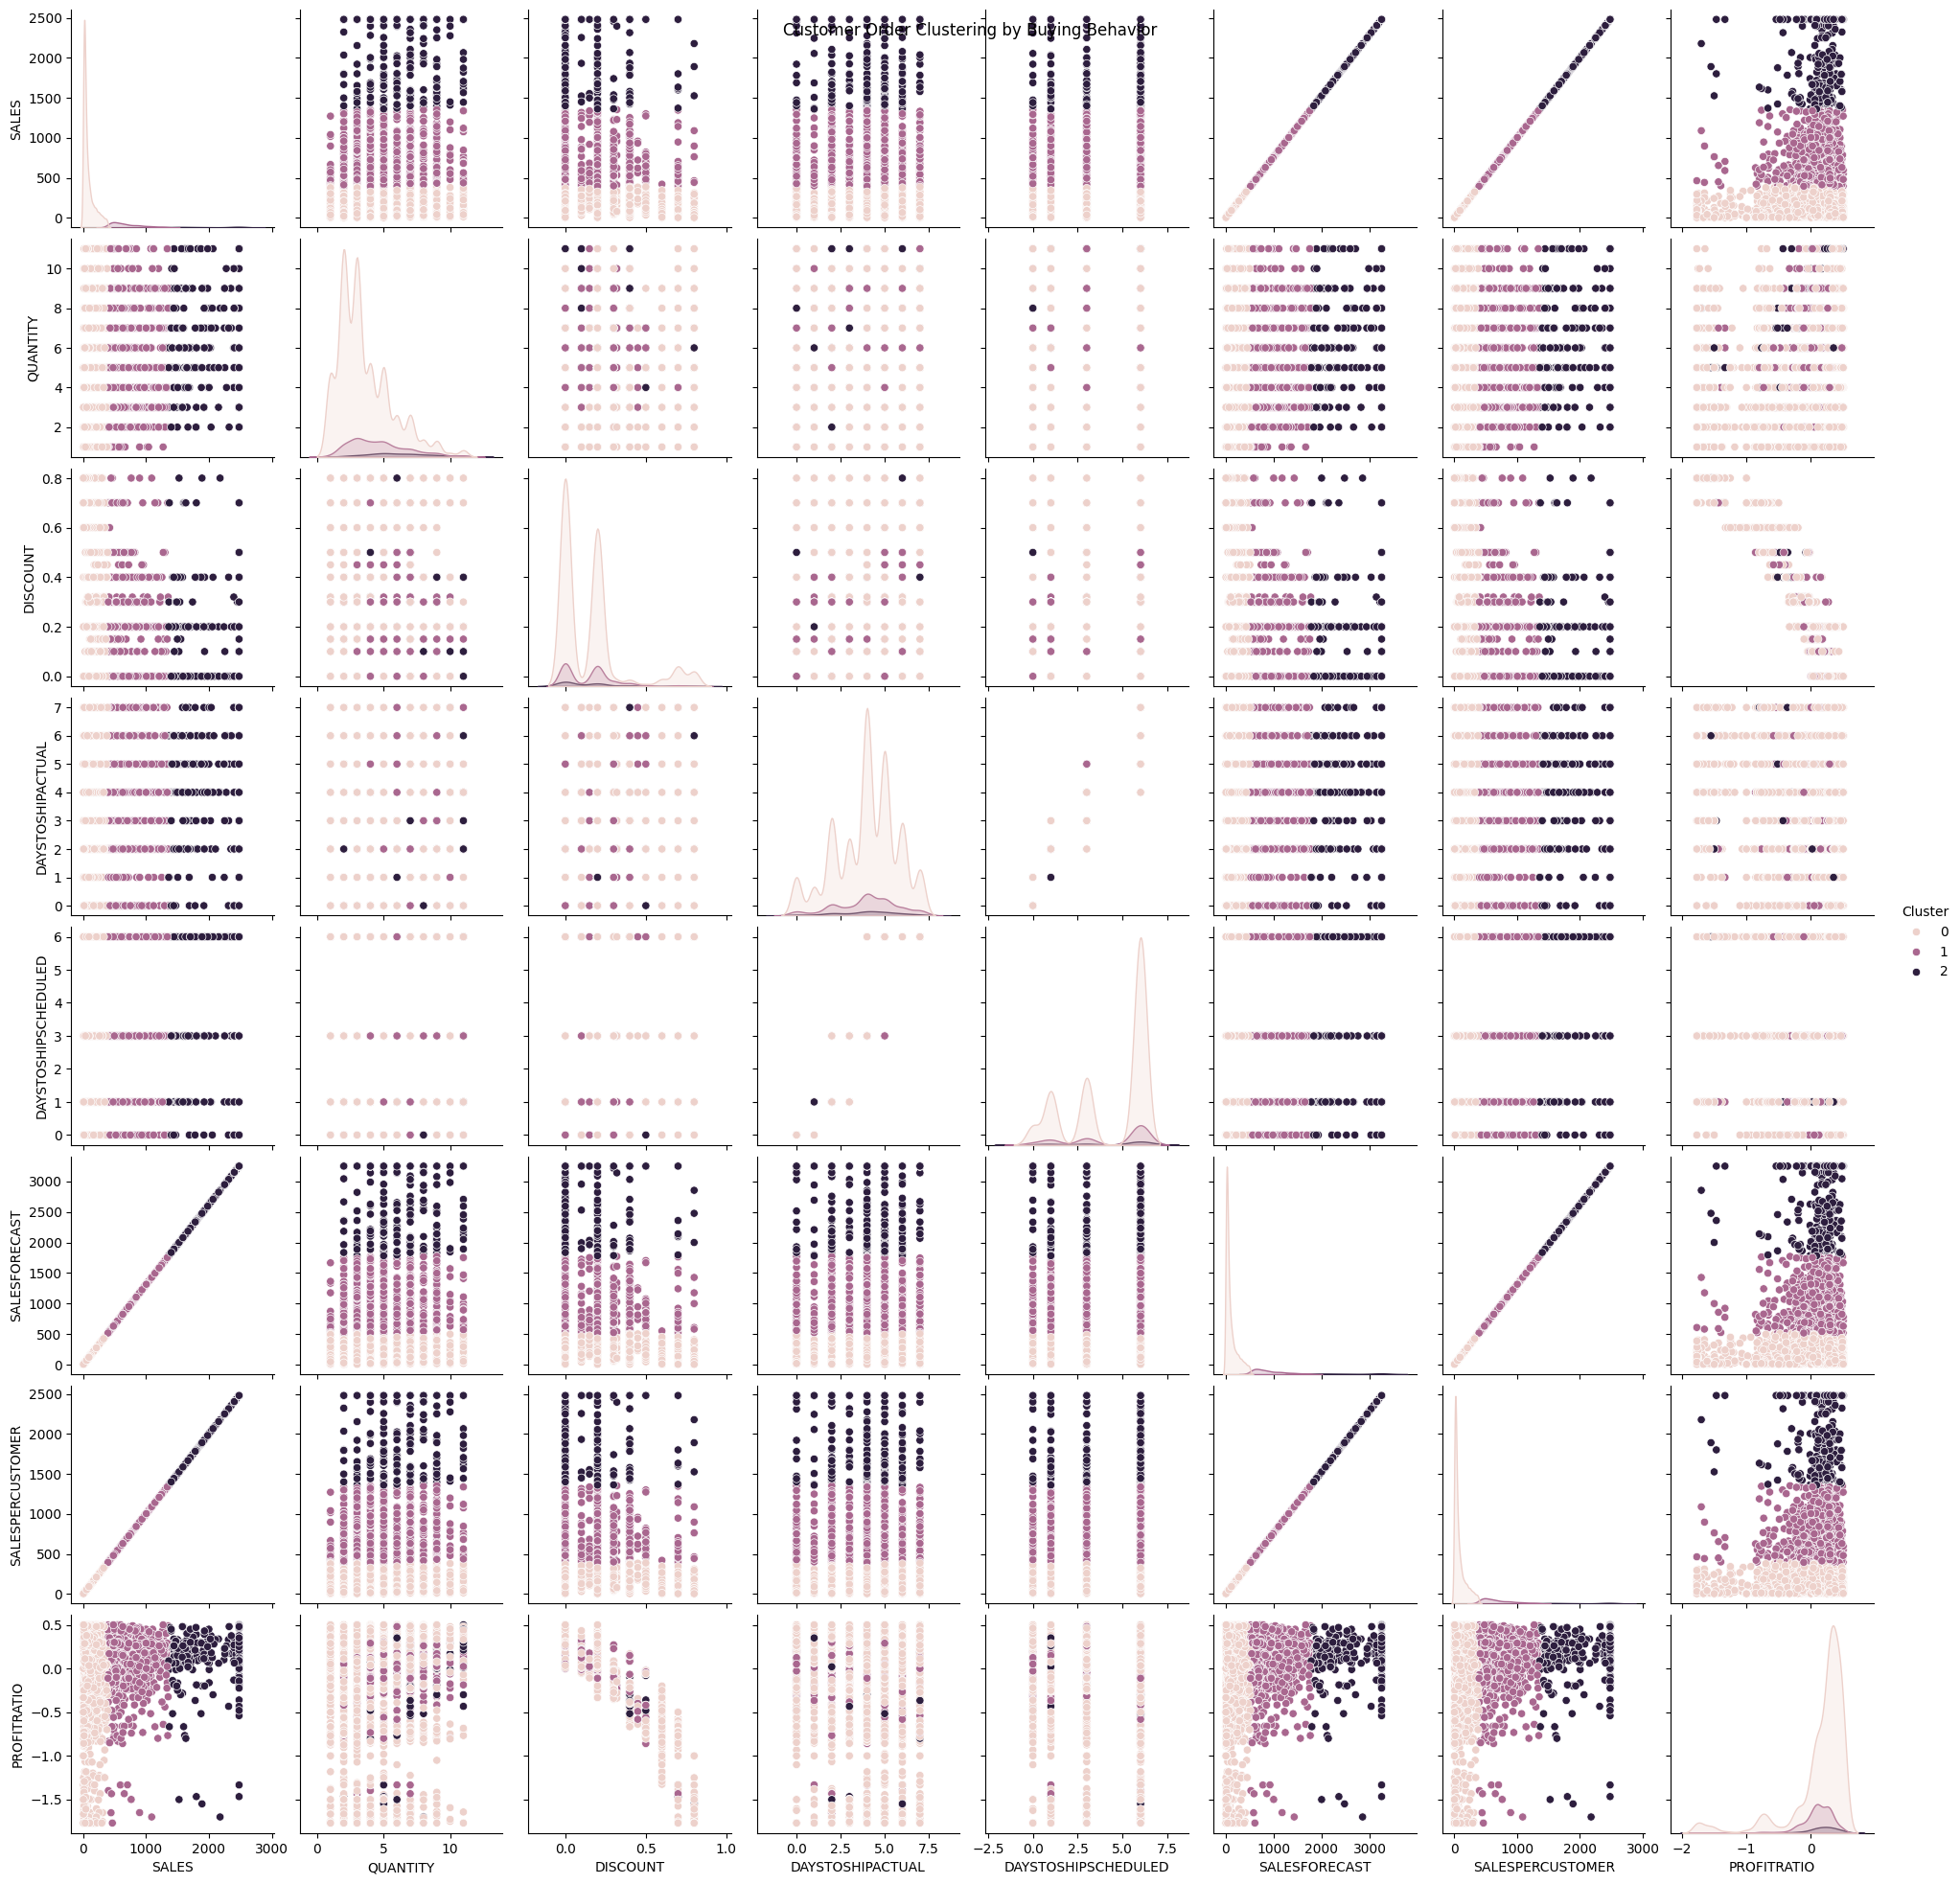

In [102]:
sns.pairplot(df_cluster, hue='Cluster')
plt.suptitle('Customer Order Clustering by Buying Behavior')
plt.show()


## Visualize Shipment Performance Across Geographies

In [103]:
!pip install snowflake-connector-python pandas seaborn matplotlib

In [104]:
# Function to run queries and get DataFrame
def run_query(query):
    cursor = conn.cursor()
    try:
        cursor.execute(query)
        df = cursor.fetch_pandas_all()
        return df
    finally:
        cursor.close()

In [109]:
# Query for geo data
query_geo = """
SELECT latitude ,longitude, ShipStatus
FROM Orders sf
JOIN Location l ON sf.StateID = l.StateID
"""

In [110]:

# Fetch the data
df_geo = run_query(query_geo)

# Check columns
print(df_geo.columns)

# Convert columns to lowercase
df_geo.columns = df_geo.columns.str.lower()


Index(['LATITUDE', 'LONGITUDE', 'SHIPSTATUS'], dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


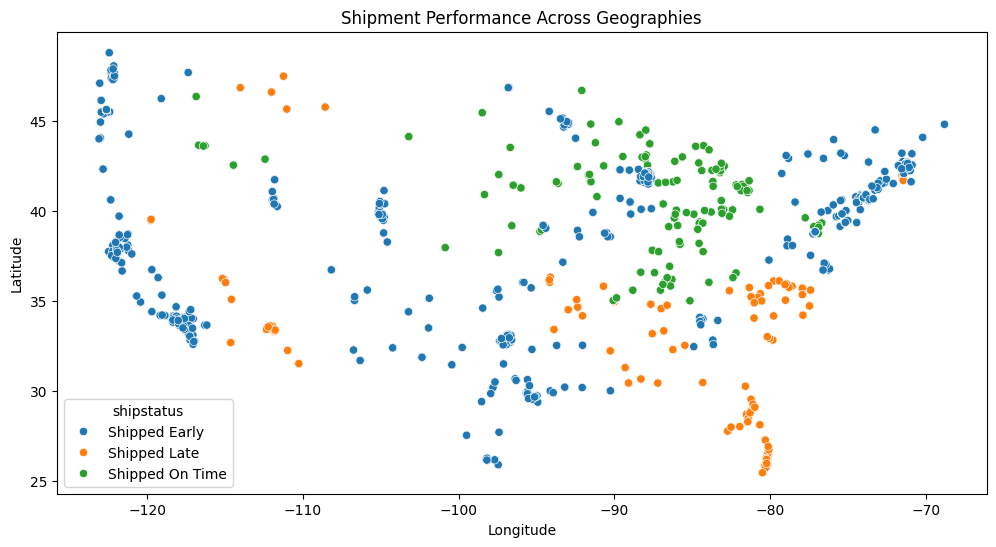

In [112]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_geo, x='longitude', y='latitude', hue='shipstatus')
plt.title('Shipment Performance Across Geographies')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Analyze Delivery Delays or Profit Trends by Latitude/Longitude

In [114]:
query = """
SELECT l.latitude, l.longitude, s.daystoshipactual, s.profit
FROM Orders s
JOIN Location l ON s.StateID = l.StateID
"""
df_delay_profit = pd.read_sql(query, conn)



<ipython-input-114-defa76166634>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_delay_profit = pd.read_sql(query, conn)


In [115]:
df_delay_profit.columns = df_delay_profit.columns.str.lower()
print(df_delay_profit.columns)

Index(['latitude', 'longitude', 'daystoshipactual', 'profit'], dtype='object')


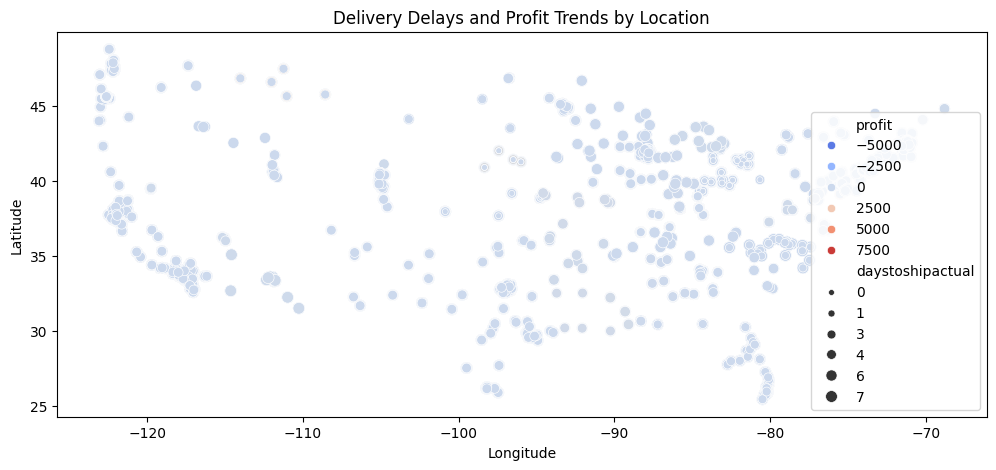

In [116]:
plt.figure(figsize=(12,5))
sns.scatterplot(
    data=df_delay_profit,
    x='longitude',
    y='latitude',
    size='daystoshipactual',
    hue='profit',
    palette='coolwarm'
)
plt.title('Delivery Delays and Profit Trends by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='best')
plt.show()